In [ ]:
import pandas as pd
import statsmodels.api as sm

In [15]:
df = pd.read_excel('./ENB2012_data.xlsx')
df.head()


,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [16]:
df.corr()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,5.878473e-17,-2.096261e-15,-1.896390e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.066832e-17,3.623317e-15,2.441409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.510469e-17,-8.647953e-17,2.077332e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.591507e-17,-1.753224e-15,-1.068485e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.876676e-17,-1.977685e-16,-9.524163e-17,0.889430,0.895785
X6,5.878473e-17,-3.066832e-17,-2.510469e-17,-5.591507e-17,4.876676e-17,1.000000e+00,-9.366058e-16,-2.608346e-16,-0.002587,0.014290
X7,-2.096261e-15,3.623317e-15,-8.647953e-17,-1.753224e-15,-1.977685e-16,-9.366058e-16,1.000000e+00,2.129642e-01,0.269842,0.207505
X8,-1.896390e-16,2.441409e-15,2.077332e-16,-1.068485e-15,-9.524163e-17,-2.608346e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222719e-01,-6.581199e-01,4.556714e-01,-8.618281e-01,8.894305e-01,-2.586763e-03,2.698417e-01,8.736846e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


In [25]:
import statsmodels.api as sm

x = sm.add_constant(df[ ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8'] ])
y = df['Y1']
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                     Y1   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     1187.
Date:                Fri, 20 Jun 2025   Prob (F-statistic):               0.00
Time:                        22:00:16   Log-Likelihood:                -1912.5
No. Observations:                 768   AIC:                             3841.
Df Residuals:                     760   BIC:                             3878.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.0134     19.034      4.414      0.0

In [31]:
influence = modelo.get_influence()
(c, p) = influence.cooks_distance

In [34]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
sfs = SequentialFeatureSelector(modelo, n_features_to_select='auto', direction='forward')
sfs.fit(x, y)
print(sfs.get_support())

[False  True False  True False  True False  True False]


# Aula 09 - Multinomial

In [ ]:
import requests
import zipfile
import io
import pandas as pd


In [22]:
url = "https://archive.ics.uci.edu/static/public/53/iris.zip"
response = requests.get(url)

# Abrir o zip diretamente da memória
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    # Listar os nomes dos arquivos contidos no zip
    print(z.namelist())
    print(30*'=')
    with z.open('iris.names') as f:
        print(f.read().decode('utf-8'))
    print(30*'=')
    with z.open('iris.data') as f:
        df = pd.read_csv(f, header=None)

df.head()

['Index', 'bezdekIris.data', 'iris.data', 'iris.names']
1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [82]:
from sklearn.model_selection import train_test_split

# Definir os nomes das colunas
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

df_train, df_test = train_test_split(
    df,
    train_size=0.6,     
    random_state=1 
)

print("Tamanho do conjunto de treino:", df_train.shape)
print("Tamanho do conjunto de teste:", df_test.shape)

display(df_train.head())

Tamanho do conjunto de treino: (90, 5)
Tamanho do conjunto de teste: (60, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
11,4.8,3.4,1.6,0.2,Iris-setosa
113,5.7,2.5,5.0,2.0,Iris-virginica
123,6.3,2.7,4.9,1.8,Iris-virginica
12,4.8,3.0,1.4,0.1,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [83]:
# Definir as colunas preditoras (todas menos 'species')
x_train = df_train.drop(columns='species')

# Definir a variável alvo
y_train = df_train['species']


display(x_train.head())
display(y_train.head())

,sepal_length,sepal_width,petal_length,petal_width
11,4.8,3.4,1.6,0.2
113,5.7,2.5,5.0,2.0
123,6.3,2.7,4.9,1.8
12,4.8,3.0,1.4,0.1
2,4.7,3.2,1.3,0.2


11        Iris-setosa
113    Iris-virginica
123    Iris-virginica
12        Iris-setosa
2         Iris-setosa
Name: species, dtype: object

## Usando o Scikit Learn que não tem Summary

In [69]:
from sklearn.linear_model import LogisticRegression

# Instanciar o modelo multinomial
model = LogisticRegression(
    solver='lbfgs',
    max_iter=200
)

# Treinar o modelo
model.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


## Usando o Stats Model

In [94]:
import statsmodels.api as sm

# Adiciona a constante (intercepto)
x_train_const = sm.add_constant(x_train)

# Ajusta a regressão logística multinomial
model = sm.MNLogit(y_train, x_train_const)
result = model.fit(method='lbfgs')
print(result.summary())


                          MNLogit Regression Results                          
Dep. Variable:                species   No. Observations:                   90
Model:                        MNLogit   Df Residuals:                       80
Method:                           MLE   Df Model:                            8
Date:                Sat, 21 Jun 2025   Pseudo R-squ.:                  0.9462
Time:                        11:09:06   Log-Likelihood:                -5.3211
converged:                      False   LL-Null:                       -98.842
Covariance Type:            nonrobust   LLR p-value:                 3.412e-36
species=Iris-versicolor       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      14.7178    467.266      0.031      0.975    -901.106     930.541
sepal_length               -3.7869    126.441     -0.030      0.976    -251.607     244.033


/Users/lucasisabel/.pyenv/versions/3.12.6/envs/meu_env/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Testando o modelo

In [95]:
# Separar X e y da base de teste
x_test = df_test.drop(columns='species')
y_test = df_test['species']

# Adicionar constante (intercepto) no X_test
x_test_const = sm.add_constant(x_test)

# Fazer as previsões (probabilidades para cada classe)
pred_probs = result.predict(x_test_const)
y_pred = pred_probs.idxmax(axis=1)

# Ver as probabilidades
print(pred_probs.head())


                0             1             2
14   1.000000e+00  5.423170e-13  1.058793e-37
98   2.448276e-10  1.000000e+00  3.650006e-09
75   4.180031e-16  9.999496e-01  5.041282e-05
16   1.000000e+00  5.673103e-11  2.142448e-33
131  7.878565e-29  4.658743e-04  9.995341e-01


## Matriz de Confusão

Real,Iris-setosa,Iris-versicolor,Iris-virginica,All
Predicted,,,,
Iris-setosa,19,0,0,19
Iris-versicolor,0,21,0,21
Iris-virginica,0,0,20,20
All,19,21,20,60


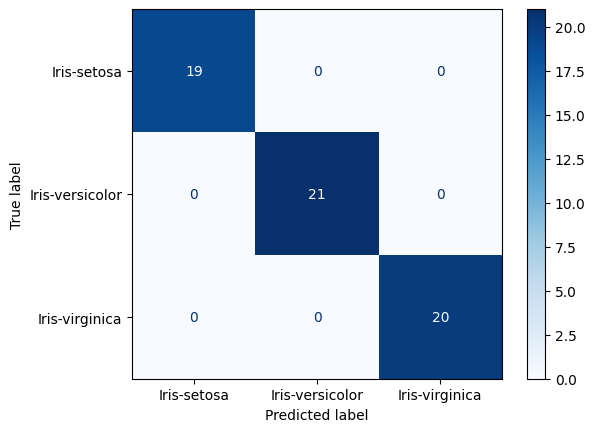

In [96]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

labels = sorted(y_train.unique())
# Criar um mapeamento
label_map = {i: label for i, label in enumerate(labels)}
# Mapear os y_pred
y_pred_named = y_pred.map(label_map)

# Gerar a matriz
cm = confusion_matrix(y_test, y_pred_named, labels=labels)

# Plotar a matriz
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')

pd.crosstab(y_pred_named, y_test, rownames=['Predicted'], colnames=['Real'], margins=True)

In [97]:
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
    cohen_kappa_score,
    classification_report,
    balanced_accuracy_score
)
import statsmodels.stats.proportion as smp
import numpy as np

# 🔹 Acurácia
acc = accuracy_score(y_test, y_pred_named)
print(f'\nAcurácia: {acc:.4f}')

# 🔹 Intervalo de confiança 95% para a acurácia
n = len(y_test)
confint = smp.proportion_confint(count=acc * n, nobs=n, alpha=0.05, method='normal')
print(f'95% CI da Acurácia: ({confint[0]:.4f}, {confint[1]:.4f})')

# 🔹 No Information Rate (NIR)
nir = y_test.value_counts(normalize=True).max()
print(f'No Information Rate (NIR): {nir:.4f}')

# 🔹 Kappa
kappa = cohen_kappa_score(y_test, y_pred_named)
print(f'Kappa: {kappa:.4f}')

# 🔹 Balanced Accuracy
balanced_acc = balanced_accuracy_score(y_test, y_pred_named)
print(f'Balanced Accuracy: {balanced_acc:.4f}')

# 🔹 Classification report (Sensibilidade, Precisão, F1, etc.)
print('\nClassification Report:')
print(classification_report(y_test, y_pred_named, target_names=labels))

# 🔹 Especificidade por classe
specificity = []
for i in range(len(labels)):
    tn = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
    fp = np.sum(np.delete(cm, i, axis=0)[:, i])
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    specificity.append(spec)

specificity_df = pd.DataFrame({
    'Class': labels,
    'Specificity': np.round(specificity, 4)
})

print('\nEspecificidade por classe:')
print(specificity_df)


Acurácia: 1.0000
95% CI da Acurácia: (1.0000, 1.0000)
No Information Rate (NIR): 0.3500
Kappa: 1.0000
Balanced Accuracy: 1.0000

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        21
 Iris-virginica       1.00      1.00      1.00        20

       accuracy                           1.00        60
      macro avg       1.00      1.00      1.00        60
   weighted avg       1.00      1.00      1.00        60


Especificidade por classe:
             Class  Specificity
0      Iris-setosa          1.0
1  Iris-versicolor          1.0
2   Iris-virginica          1.0
